In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
scrumbed=pd.read_csv(r"C:\Users\singa tharun reddy\Desktop\Github projects\scrubbed.csv",low_memory = False, 
                        na_values = ['UNKNOWN','UNK'], 
                        na_filter = True, 
                        skip_blank_lines = True)

In [3]:
scrumbed.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
df=scrumbed

In [5]:
df.info()
# Initial observation on data
#1. Date time  and date posted column are in object data type , have to change them to datetime format.
#2. duration and latitute columns are in object data type , have to change them to float data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [6]:
df.shape

(80332, 11)

In [7]:
df.latitude.describe()

count          80332
unique         18445
top       47.6063889
freq             581
Name: latitude, dtype: object

In [8]:
df['latitude'] = pd.to_numeric(df['latitude'],errors = 'coerce')  # converting latitude and longitude to numerics
df['longitude '] = pd.to_numeric(df['longitude '], errors='coerce')

In [9]:
twenty_fours = df['datetime'].str[-5:] == '24:00'
df.loc[twenty_fours, 'datetime'] = df['datetime'].str[:-5] + '00:00'
# Replaing 24:00 with 0:00 for date time and date posted columns

In [10]:
df['datetime']=pd.to_datetime(df['datetime'], utc=False)
df['date posted']=pd.to_datetime(df['date posted'], utc=False)

In [11]:
df = df.fillna(method="pad")

In [12]:
df.isna().sum()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

In [13]:
#s=df["duration (hours/min)"].value_counts().gt(2)
#df=df.loc[df["duration (hours/min)"].isin(s[s].index)]

In [14]:
#len(df['duration (hours/min)'].value_counts())

In [15]:
#df = pd.DataFrame(df['duration (hours/min)'].str.split(' ',1).tolist(), columns = ['','row'])

In [16]:
df=df.drop("duration (hours/min)",axis=1)

In [17]:
df.dropna(inplace=True)

# How is the trend of encounters over time?
Number of encounters have expotenntially increased from 1994. During the same year, Alien movie was released.

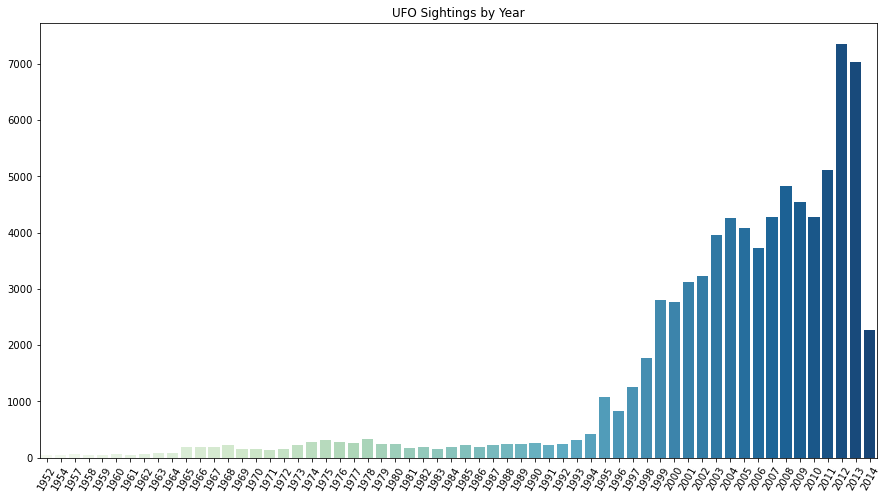

In [18]:
df_yr = df.datetime.dt.year 
## Set axes ##
years_data = df_yr.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data.values

## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[0:60],y=years_values[0:60], palette = "GnBu")


# Is there any Month we are likely to encounter UFO?
July is the vacation month for aliens to visit the earth.

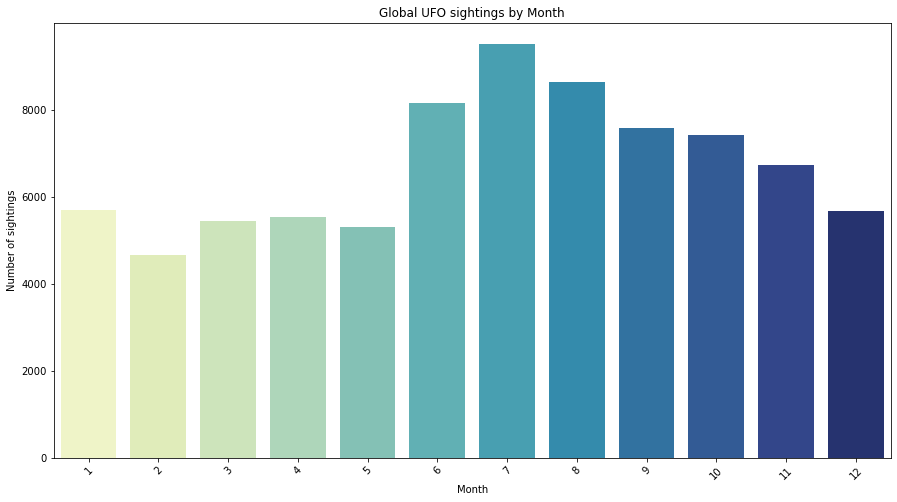

In [19]:
df_mo = df.datetime.dt.month
df_mo_v=df_mo.value_counts()
x_mo=df_mo_v.values
y_mo=df_mo_v.index

f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=y_mo,y=x_mo,palette="YlGnBu")
ax.set_title("Global UFO sightings by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of sightings")
plt.xticks(rotation=45)
plt.show()

# Is there any Season we are likely to encounter UFO?
We are likely to encounter UFO in winter season in the Northern Hemisphere.


In [20]:
df_s= df.datetime.dt.month
spring = range(5,7)
summer = range(7,10)
fall = range(10,12)
seasons = []

for i in df_s:
    # Conversion Process # 
    if i in spring:
        seasons.append('Spring')
    elif i in summer:
        seasons.append('Summer')
    elif i in fall:
        seasons.append('Fall')
    else:
        seasons.append('Winter')
        

In [21]:
df["seasons"]=seasons

In [22]:
hemisphere=[]
for i in df["latitude"]:
    if i >=0:
        hemisphere.append("Northern Hemisphere")
    else:
        hemisphere.append("Southern Hemisphere")

In [23]:
df["Hemisphere"]=hemisphere

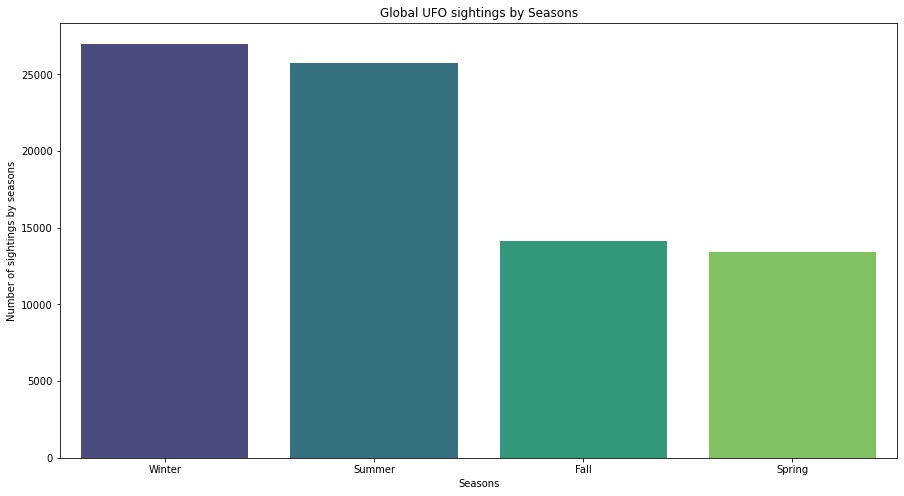

In [24]:
df_sea=df["seasons"].value_counts()
y_so=df_sea.values
x_so=df_sea.index

f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x_so,y=y_so,palette="viridis")
ax.set_title("Global UFO sightings by Seasons")
ax.set_xlabel("Seasons")
ax.set_ylabel("Number of sightings by seasons")
plt.show()

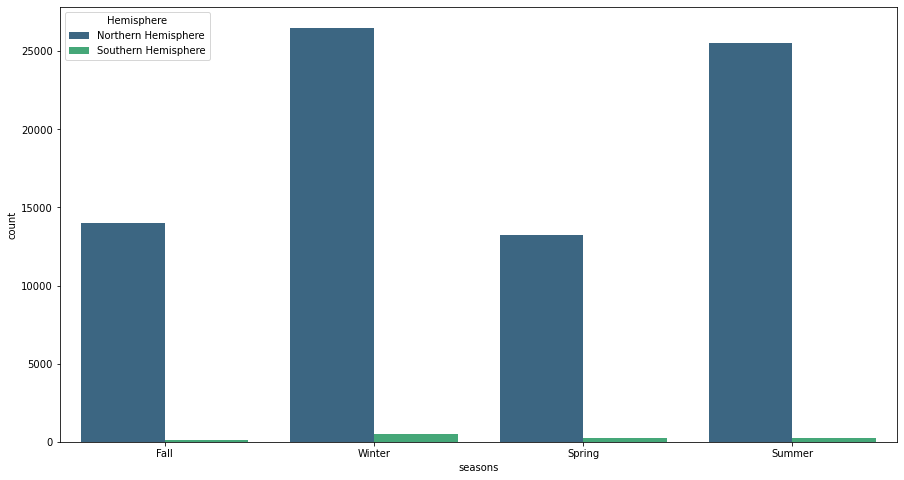

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='seasons', hue='Hemisphere', data=df,palette="viridis")
#We don't have much data of southern hemisphere.

In [26]:
df["country"]=df["country"].map({"us":"USA", "ca":"Canada", "gb":"Great Britain", "au":"Australia"})

# Most popular UFO shape encountered is?

Light is the common shape.Traingle and circle shapes occupy second and third place respectively.



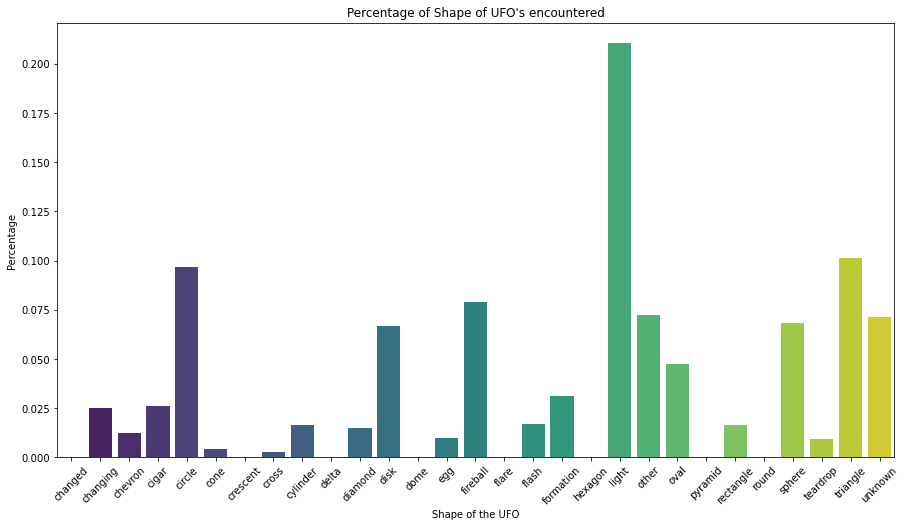

In [27]:
ufo_shape = df.groupby('shape').count()
ufo_shape_per=ufo_shape.datetime/ufo_shape.datetime.sum()
y_ufo=ufo_shape_per.values
x_ufo=ufo_shape_per.index

f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x_ufo,y=y_ufo,palette="viridis")
ax.set_title("Percentage of Shape of UFO's encountered")
ax.set_xlabel("Shape of the UFO")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

# Most popular UFO shape encountered according to country?

In [28]:
top_3_shapes_of_each_country = pd.DataFrame(df.groupby('country')['shape'].value_counts().groupby(level=0).head(3))
top_3_shapes_of_each_country.columns = ['Count']
top_3_shapes_of_each_country

Count
country       shape          
Australia     light       143
              circle       73
              disk         59
Canada        light       758
              circle      336
              triangle    310
Great Britain light       428
              circle      276
              triangle    197
USA           light     15550
              triangle   7574
              circle     7064

# Which country has highest percentage of sightings?


USA has the highest percentage of sightings with 92.2%.

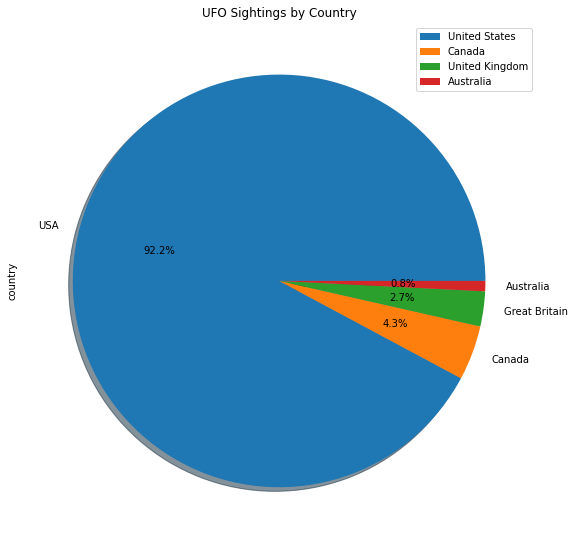

In [29]:
sightings_by_country=df.country.value_counts()
sightings_by_country.plot.pie(title='UFO Sightings by Country',autopct='%1.1f%%',shadow=True,figsize=(8,8))
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="best")
plt.tight_layout()
plt.gca().set_aspect('equal')

# Which State in USA has highest percentage of sightings?

California has encounterd highest number of UFO visits.

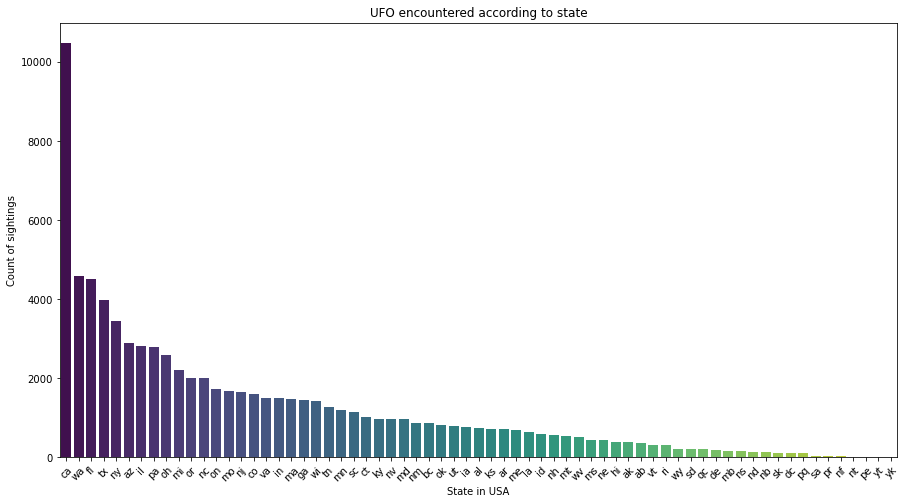

In [30]:
states = df['state']
state_count = states.value_counts()
y_state=state_count.values
x_state=state_count.index

f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x_state,y=y_state,palette="viridis")
ax.set_title("UFO encountered according to state")
ax.set_xlabel("State in USA")
ax.set_ylabel("Count of sightings")
plt.xticks(rotation=45)
plt.show()

# How is the trend between UFO shape and latitude?

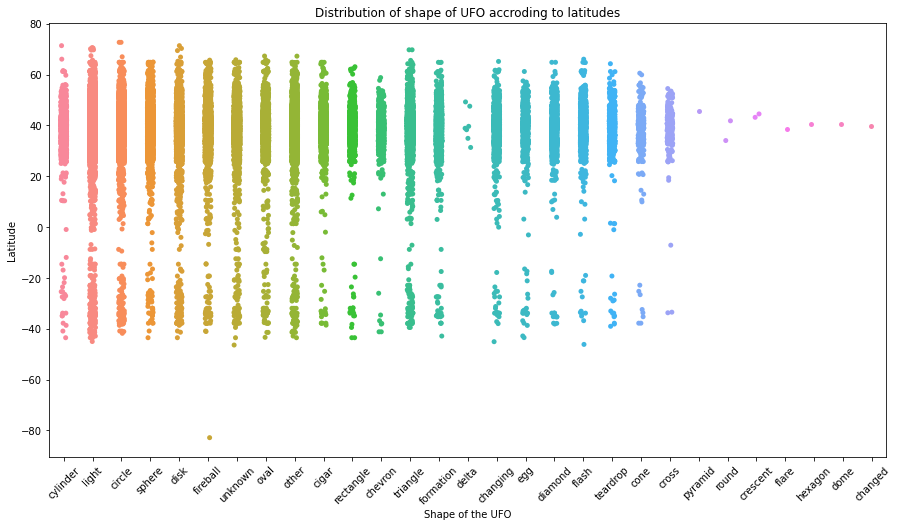

In [31]:
f,ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="shape", y="latitude", data=df, jitter=True)
ax.set_title("Distribution of shape of UFO accroding to latitudes")
ax.set_xlabel("Shape of the UFO")
ax.set_ylabel("Latitude")
plt.xticks(rotation=45)
plt.show()

# How is the trend between UFO shape and longitude?

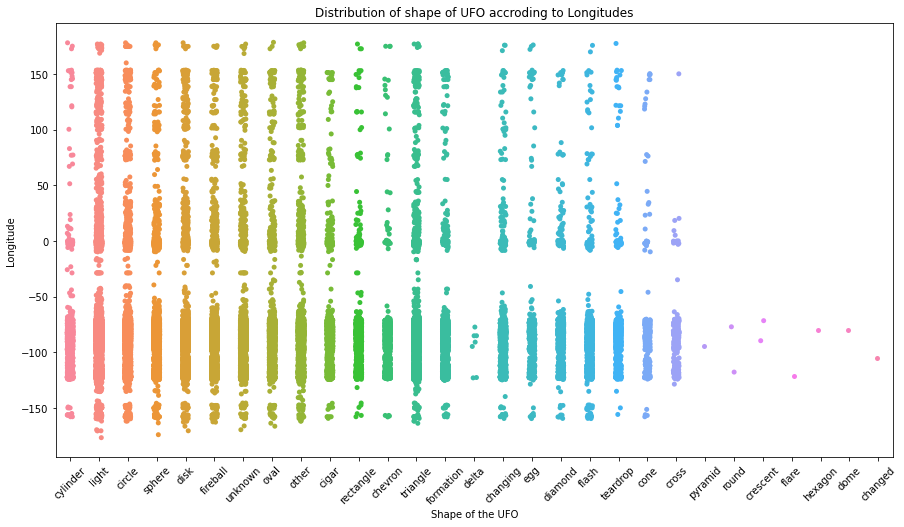

In [32]:
f,ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="shape", y="longitude ", data=df, jitter=True)
ax.set_title("Distribution of shape of UFO accroding to Longitudes")
ax.set_xlabel("Shape of the UFO")
ax.set_ylabel("Longitude ")
plt.xticks(rotation=45)
plt.show()